In [52]:
import numpy as np
from numpy import cos
from numpy import sin
from numpy import pi
from scipy.optimize import fsolve
import matplotlib.pyplot as plt



# Introduction

Given the Hamiltonian $\mathcal{H}$, we define a vector of operators $X$ such that,

$\mathcal{H} = X^{\dagger}HX$

Where $H$ is a matrix of complex numbers.

We want to find the matrix $\Omega_L$ such that,

$i\dot{X} = \Omega_LX$

Beginning with the equation of motion,

$i\dot{X}_i = [X_i,\mathcal{H}]$

Substituting $\mathcal{H} = X^{\dagger}_k H_{kl}X_l$,

$\begin{split}
i\dot{X}_i &= [X_i, X^{\dagger}_k H_{kl}X_l] \\
&= H_{kl}[X_i, X_k^{\dagger}]X_l + H_{kl}X_k^{\dagger}[X_i, X_l]
\end{split}
$

Substituting $g = [X_i, X_k^{\dagger}]$,


$
i\dot{X}_i = H_{kl}g_{ik}X_l + H_{kl}X_k^{\dagger}[X_i, X_l]
$

Suppose $P$ exists such that $X_k^{\dagger} = P_{km}X_m$ then,

$\begin{split}
i\dot{X}_i &= H_{kl}g_{ik}X_l + H_{kl}P_{km}X_m[X_i, P_{nl}^{-1}X_n^{\dagger}] \\
           &=  H_{kl}g_{ik}X_l + g_{in}P_{nl}^{-1}H_{kl}P_{km}X_m 
\end{split}$

Putting back into matrix form,

$i\dot{X} = gHX + g(P^{-1})^TH^TPX$

So we have found $\Omega_L = gH + g(P^{-1})^TH^TP$

# Example: GdVO4, c-axis external field

From appendix A of my thesis the Hamiltonian for GdVO$_4$ with an external field applied aling the $c$-axis can be expressed as,

$\mathcal{H} = C\sum_k(\hat{a}_k^{\dagger}\hat{a}_k - \hat{b}_k^{\dagger}\hat{b}_k) + A\sum_k(\hat{a}_k^{\dagger}\hat{a}_k + \hat{b}_k^{\dagger}\hat{b}_k) + \sum_k(B_k\hat{a}_k\hat{b}_k + B^*_k\hat{a}_k^{\dagger}\hat{b}_k^{\dagger})$

where,

$A = g\mu_B(H_E + H_A)$

$B_k = g\mu_BH_E\gamma_{-k}$

$C = g\mu_BH_0$

For $k = 0$ we can express this in the matrix form,

$\mathcal{H} = \begin{pmatrix} \hat{a}^{\dagger} & \hat{a} & \hat{b}^{\dagger}& \hat{b} \end{pmatrix}  \begin{pmatrix} A+C & 0 & 0 & B^*/2  \\ 0 & 0 & B/2 & 0 \\ 0 & B^*/2 & A-C & 0 \\ B/2 & 0 & 0 & 0 \end{pmatrix} \begin{pmatrix} \hat{a} \\ \hat{a}^{\dagger} \\ \hat{b} \\ \hat{b}^{\dagger} \end{pmatrix}$

So in terms of the theory discussed above we have that $X = (\hat{a}, \hat{a}^{\dagger}, \hat{b}, \hat{b}^{\dagger})^T$ and hence,

$\begin{split} g &= [X, X^{\dagger}] \\
   &= X(X^*)^T - (X^*X^T)^T \\
   &= \begin{pmatrix}\hat{a} \\ \hat{a}^{\dagger} \\ \hat{b} \\ \hat{b}^{\dagger} \end{pmatrix}\begin{pmatrix}\hat{a}^{\dagger} & \hat{a} & \hat{b}^{\dagger} & \hat{b} \end{pmatrix} - \left[\begin{pmatrix}\hat{a}^{\dagger} \\ \hat{a}  \\ \hat{b}^{\dagger} \\ \hat{b}\end{pmatrix} \begin{pmatrix}\hat{a} & \hat{a}^{\dagger} & \hat{b} & \hat{b}^{\dagger} \end{pmatrix}\right]^T  \\
   &= \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix}\end{split}$ 

Furthermore we can calculate $P$.

$P = \begin{pmatrix} 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$



Text(0, 0.5, '$\\omega$ (GHz)')

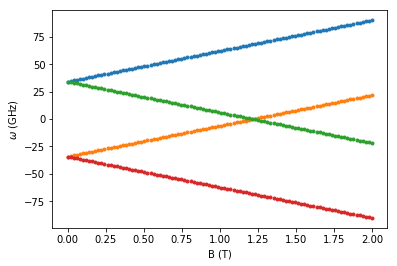

In [53]:
# Constants for GVO
g = 2 # g-tensor
mub = 14 # Bohr magneton (GHz/T)

# Effective fields have been taken from Abraham1992 - "Antiferromagnetic resonance in GdVO4" 
He = 1.655 # Effective exhange field (T)
Ha = 0.401 # Effective anisotropy field (T)

# Magnetic field values
Bfield = np.linspace(0,2,100) # (T)

# Looping over Bfield values
omega = np.zeros((len(Bfield),4))

count = 0
for Bval in Bfield:
    # Set up A,B,C parameters
    A = g*mub*(He + Ha)
    B = g*mub*He
    C = g*mub*Bval

    # Setup G,H and P matrices
    H = np.matrix([[(A+C), 0, 0, B/2],
                [0, 0, B/2, 0],
                [0, B/2, (A-C), 0],
                [B/2, 0, 0, 0]])

    G = np.matrix([[1, 0, 0, 0],
                [0, -1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, -1]])

    P = np.matrix([[0, 1, 0, 0],
                [1, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 1, 0]])

    # Calculate Omega_L
    OmegaL = G*H + G*(P.I).T*H.T*P

    # Diagonalizing Omega_L for magnon solutions
    omega[count,:] = np.linalg.eigvals(OmegaL) 

    #iterating loop
    count += 1


#Plotting
plt.plot(Bfield, omega[:,0],'.')
plt.plot(Bfield, omega[:,1],'.')
plt.plot(Bfield, omega[:,2],'.')
plt.plot(Bfield, omega[:,3],'.')
plt.xlabel('B (T)')
plt.ylabel(r'$\omega$ (GHz)')



# (OLD THEORY) Allowing the external field to rotate

The following code follows the work of the PDF "Antferromagnetic Resonance - Spin wave theory". Which was originally written with the goal of analysing AFM resonance with an external field applied in any direction. 

We begin with the Hamiltonian,

$\mathcal{H} = -2J\sum_{f,g}S_f \cdot S_g - K[\sum_f (S_f^z)^2 + \sum_g(S_g^z)^2] - \mu_BgH_0\cdot[\sum_f S_f + \sum_g S_g]$

This Hamiltonian models two magnetically equivilant sublattices $f$ and $g$. with the nearest neighbours of a spin on one sublattice lying entirely on the other lattice. The Hamiltonian contains an exchange term and aniostropy term and Zeeman term.

........

Starting from equation (46) for $k = 0$, WHAT g for H_A and H_E???

$\begin{split}
\mathcal{H} &= \mu_B\left[ gAH_E - \frac{1}{2}gH_A\sin^2(\theta) + gH_A\cos^2(\theta) -H_0\left[-g_x\sin(\alpha)\sin(\theta) -g_z\cos(\alpha)\cos(\theta) \right] \right]\hat{a}^{\dagger}\hat{a} \\
&+ \mu_B\left[ gAH_E - \frac{1}{2}gH_A\sin^2(\theta) + gH_A\cos^2(\theta) -H_0\left[g_x\sin(\alpha)\sin(\phi) + g_z\cos(\alpha)\cos(\phi) \right] \right]\hat{b}^{\dagger}\hat{b} \\
&+ \frac{1}{2}g\mu_BH_E[A - 1](\hat{a}\hat{b}^{\dagger} + \hat{a}^{\dagger}\hat{b}) \\
&+ \frac{1}{2}g\mu_BH_E[A + 1](\hat{a}^{\dagger}\hat{b}^{\dagger} + \hat{a}\hat{b}) \\
&- \frac{1}{4}g\mu_BH_A\sin^2(\theta)[\hat{a}\hat{a} + \hat{a}^{\dagger}\hat{a}^{\dagger}] \\
&- \frac{1}{4}g\mu_BH_A\sin^2(\phi)[\hat{b}\hat{b} + \hat{b}^{\dagger}\hat{b}^{\dagger}]
\end{split}$

Giving the coefficeients labels $c_1$ to $c_6$,

$\begin{split}
\mathcal{H} &= c_1\hat{a}^{\dagger}\hat{a} + c_2\hat{b}^{\dagger}\hat{b} \\
&+ c_3(\hat{a}\hat{b}^{\dagger} + \hat{a}^{\dagger}\hat{b}) \\
&+ c_4(\hat{a}^{\dagger}\hat{b}^{\dagger} + \hat{a}\hat{b}) \\
&+ c_5(\hat{a}\hat{a} + \hat{a}^{\dagger}\hat{a}^{\dagger}) \\
&+ c_6(\hat{b}\hat{b} + \hat{b}^{\dagger}\hat{b}^{\dagger})
\end{split}$

we can express this Hamiltonian in the form $\mathcal{H} = X^{\dagger}HX$ where, (DO WE NEED THE /2??? terms to make hermition)

$H = \begin{pmatrix} c_1 & c_5 & c_3/2 & c_4/2 \\ c_5 & 0 & c_4/2 & c_3/2 \\ c_3/2 & c_4/2 & c_2 & c_6 \\ c_4/2 & c_3/2 & c_6 & 0 \end{pmatrix}$

Rest should follow from above?

Text(0.5, 1.0, '$\\alpha$ = 0.0 $\\pi$ radians')

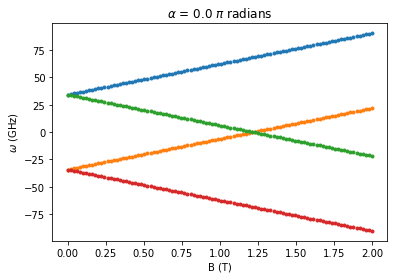

In [54]:
# Constants for GVO
g = 2 # g-tensor
gx = 2
gz = 2

mub = 14 # Bohr magneton (GHz/T)

# Effective fields have been taken from Abraham1992 - "Antiferromagnetic resonance in GdVO4" 
He = 1.655 # Effective exhange field (T)
Ha = 0.401 # Effective anisotropy field (T)

# Inputs
alpha = pi/2 #Angle between magnetic field and c-axis

# Magnetic field values
Bfield = np.linspace(0,2,100) # (T)

# Looping over Bfield values
omega = np.zeros((len(Bfield),4))

#Iterating with count
count = 0

for Bval in Bfield:
    # # For each Bfield value, find theta and phi (the ground state configuration)
    #Setting up function for rootfinding theta and phi
    def equations(params):
        theta, phi = params
        B = cos(theta)*sin(phi) - sin(theta)*cos(phi)
        output1 = -0.5*g*mub*B + 0.5*g*mub*Ha*cos(theta)*sin(theta) - (mub/2)*Bval*(gx*sin(alpha)*cos(theta) - gz*cos(alpha)*sin(theta))
        output2 = -0.5*g*mub*B - 0.5*g*mub*Ha*cos(phi)*sin(phi) - (mub/2)*Bval*(gx*sin(alpha)*cos(phi) - gz*cos(alpha)*sin(phi))
        return [output1, output2]

    theta, phi = fsolve(equations, (0,0))
    A = cos(theta)*cos(phi)+ sin(theta)*sin(phi)

    # Set up c-constants
    c1 = mub*(g*A*He -0.5*g*Ha*(sin(theta))**2 + g*Ha*(cos(theta))**2 - Bval*(-gx*sin(alpha)*sin(theta) - gz*cos(alpha)*cos(theta)) )
    c2 = mub*(g*A*He -0.5*g*Ha*(sin(theta))**2 + g*Ha*(cos(theta))**2 - Bval*(gx*sin(alpha)*sin(phi) + gz*cos(alpha)*cos(phi)) )
    c3 = 0.5*g*mub*He*(A-1)
    c4 = 0.5*g*mub*He*(A+1)
    c5 = -0.25*g*mub*Ha*(sin(theta))**2
    c6 = -0.25*g*mub*Ha*(sin(phi))**2

    # Setup G,H and P matrices
    H = np.matrix([[c1,   c5,   c3/2, c4/2],
                    [c5,   0,    c4/2, c3/2],
                    [c3/2, c4/2, c2,   c6],
                    [c4/2, c3/2, c6,   0]])

    G = np.matrix([[1, 0, 0, 0],
                [0, -1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, -1]])

    P = np.matrix([[0, 1, 0, 0],
                [1, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 1, 0]])

    # Calculate Omega_L
    OmegaL = G*H + G*(P.I).T*H.T*P

    # Diagonalizing Omega_L for magnon solutions
    omega[count,:] = np.linalg.eigvals(OmegaL) 

    #iterating loop
    count += 1


#Plotting
plt.plot(Bfield, omega[:,0],'.')
plt.plot(Bfield, omega[:,1],'.')
plt.plot(Bfield, omega[:,2],'.')
plt.plot(Bfield, omega[:,3],'.')
plt.xlabel('B (T)')
plt.ylabel(r'$\omega$ (GHz)')
plt.title(r'$\alpha$ = %s $\pi$ radians' % (alpha/np.pi))

# New Theory

We begin with the Hamiltonian,

$\mathcal{H} = -2J\sum_{f,g}S_f \cdot S_g - K[\sum_f (S_f^z)^2 + \sum_g(S_g^z)^2] - \mu_BgH_0\cdot[\sum_f S_f + \sum_g S_g]$

This Hamiltonian models two magnetically equivilant sublattices $f$ and $g$. with the nearest neighbours of a spin on one sublattice lying entirely on the other lattice. The Hamiltonian contains an exchange term and aniostropy term and Zeeman term.

-> TO DO: write this in a form which can be solved with lagragian to find the new ground state which we then linearize around with transformations below

## Testing matrix transformations with $\alpha$ = 0

We begin by writing our Hamilitonian with spin vectors,

$\mathcal{H} = S H S$

Where $ S = (S_{fx}, S_{fy}, S_{fz}, S_{gx}, S_{gy}, S_{gz}, 1)$. 

For the Hamitlonian above we get

$H = \begin{pmatrix} 
0 & 0 & 0 & -J & 0 & 0 & -\mu_Bg_xH_0^x\\
0 & 0 & 0 & 0 & -J & 0 & -\mu_Bg_yH_0^y\\
0 & 0 & -K & 0 & 0 & -J & -\mu_Bg_zH_0^z\\
-J & 0 & 0 & 0 & 0 & 0 & -\mu_Bg_xH_0^x\\
0 & -J & 0 & 0 & 0 & 0 & -\mu_Bg_yH_0^y\\
0 & 0 & -J & 0 & 0 & -K & -\mu_Bg_zH_0^z\\
\end{pmatrix}$

This hamiltonian is expressed in terms of the rotated spin vectors $S'$ by applying the rotation matrix $R$,

$S = RS'$

Where,

$R = \begin{pmatrix} 
\cos(\theta) & 0 & \sin(\theta) & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0\\
-\sin(\theta) & 0 & \cos(\theta) & 0 & 0 & 0 & 0\\
0 & 0 & 0 & \cos(\phi) & 0 & \sin(\phi) & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & -\sin(\phi) & 0 & \cos(\phi) & 1\\
\end{pmatrix}$


The rotated spin vectors $S'$ are then expressed in terms of bosonic operators using the Holstein-Primakoff transfomrations below,

$S_{fx}' = \frac{1}{2}(S^+_f + S_f^-) = \frac{\sqrt{2S}}{2}(\hat{a}_f + \hat{a}_f^{\dagger}) = \sqrt{\frac{S}{N}}(\hat{a}_0 + \hat{a}_0^{\dagger})$

$S_{fy}' = \frac{1}{2i}(S^+_f - S_f^-) = \frac{\sqrt{2S}}{2i}(\hat{a}_f - \hat{a}_f^{\dagger}) = \frac{\sqrt{S}}{i\sqrt{N}}(\hat{a}_0 - \hat{a}_0^{\dagger})$

$S_{fz}' = S - \hat{a}_f^{\dagger}\hat{a}_f = S - \frac{2}{N}\hat{a}_0^{\dagger}\hat{a}_0$

$S_{gx}' =\frac{1}{2}(S^+_g + S_g^-) = \frac{\sqrt{2S}}{2}(\hat{b}_f + \hat{b}_f^{\dagger}) = \sqrt{\frac{S}{N}}(\hat{b}_0 + \hat{b}_0^{\dagger})$

$S_{gy}' =$

$S_{gz}' = -S  + \hat{b}_g^{\dagger}\hat{b}_g = -S + \frac{2}{N}\hat{b}^{\dagger}_0\hat{b}_0$

We represent this transformation with the matrix $H_p$ and vector $X$,

$\begin{split}
S' &= H_p X \\
&= H_p \begin{pmatrix} \hat{a}_0^{\dagger} \\ \hat{a}_0 \\ \hat{a}_0\hat{a}_0^{\dagger} \\ \hat{a}_0^{\dagger}\hat{a}_0 \\ \hat{b}_0^{\dagger} \\ \hat{b}_0 \\ \hat{b}_0\hat{b}_0^{\dagger} \\ \hat{b}_0^{\dagger}\hat{b}_0 \\ 1 \end{pmatrix}
\end{split}$

Where $H_p$, (DONT THINK FACTOR OF N SHOULD BE HERE?)

$H_p = \begin{pmatrix}
\sqrt{\frac{S}{N}} & \sqrt{\frac{S}{N}} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
-\frac{\sqrt{S}}{i\sqrt{N}} & \frac{\sqrt{S}}{i\sqrt{N}} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -\frac{2}{N} & 0 & 0 & 0 & 0 & S \\
0 & 0 & 0 & 0 &  \sqrt{\frac{S}{N}} & \sqrt{\frac{S}{N}} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 &  -\frac{\sqrt{S}}{i\sqrt{N}} & \frac{\sqrt{S}}{i\sqrt{N}} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{2}{N} & -S \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}$

$H_p^T\cdot H_p = \begin{pmatrix}
0 & \frac{2S}{N} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{2S}{N} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & \frac{-4}{N^2} & 0 & 0 & 0 & 0 & \frac{-2S}{N} \\
0 & 0 & 0 & 0 & 0 & \frac{2S}{N} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \frac{2S}{N} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{4}{N^2} & \frac{-2S}{N} \\
0 & 0 & 0 & \frac{-2S}{N} & 0 & 0 & 0 & \frac{-2S}{N} & 2S^2 + 1 
\end{pmatrix}$

So putting it all together we represent our original hamiltonian $\mathcal{H}$ as,

$\mathcal{H} = X^{\dagger}(H_p^TR^THRH_p)X$

We can now apply the same approach as described in the [introduction](#Introduction) section. Calculating $g$:

$\begin{split} g &= [X, X^{\dagger}] \\
   &= X(X^*)^T - (X^*X^T)^T \\
   &= \begin{pmatrix} \hat{a}_0^{\dagger} \\ \hat{a}_0 \\ \hat{a}_0\hat{a}_0^{\dagger} \\ \hat{a}_0^{\dagger}\hat{a}_0 \\ \hat{b}_0^{\dagger} \\ \hat{b}_0 \\ \hat{b}_0\hat{b}_0^{\dagger} \\ \hat{b}_0^{\dagger}\hat{b}_0 \\ 1 \end{pmatrix} \begin{pmatrix} \hat{a}_0 & \hat{a}_0^{\dagger} & \hat{a}_0^{\dagger}\hat{a}_0 & \hat{a}_0\hat{a}_0^{\dagger} & \hat{b}_0 & \hat{b}_0^{\dagger} & \hat{b}^{\dagger}_0\hat{b}_0 & \hat{b}_0\hat{b}_0^{\dagger} & 1 \end{pmatrix}
    - \left[\begin{pmatrix} \hat{a}_0 \\ \hat{a}_0^{\dagger} \\ \hat{a}_0^{\dagger}\hat{a}_0 \\ \hat{a}_0\hat{a}_0^{\dagger} \\ \hat{b}_0 \\ \hat{b}_0^{\dagger} \\ \hat{b}^{\dagger}_0\hat{b}_0 \\ \hat{b}_0\hat{b}_0^{\dagger} \\ 1 \end{pmatrix} \begin{pmatrix} \hat{a}_0^{\dagger} & \hat{a}_0 & \hat{a}_0\hat{a}_0^{\dagger} & \hat{a}_0^{\dagger}\hat{a}_0 & \hat{b}_0^{\dagger} & \hat{b}_0 & \hat{b}_0\hat{b}_0^{\dagger} & \hat{b}_0^{\dagger}\hat{b}_0 & 1 \end{pmatrix}\right]^T  \\
   &= \begin{pmatrix} -1 & 0 & \hat{a}^{\dagger}\hat{a}^{\dagger}\hat{a} - \hat{a}^{\dagger}\hat{a}\hat{a}^{\dagger} &  \hat{a}^{\dagger}\hat{a}\hat{a}^{\dagger} - \hat{a}\hat{a}^{\dagger}\hat{a}^{\dagger} & 0 & 0 & 0 & 0 & 0\\ 0 & 1 & \hat{a}\hat{a}^{\dagger}\hat{a} - \hat{a}^{\dagger}\hat{a}\hat{a} & \hat{a}\hat{a}\hat{a}^{\dagger} - \hat{a}\hat{a}^{\dagger}\hat{a} & 0 & 0 & 0 & 0 & 0 \\ \hat{a}\hat{a}^{\dagger}\hat{a} - \hat{a}\hat{a}\hat{a}^{\dagger} & \hat{a}\hat{a}^{\dagger}\hat{a}^{\dagger} - \hat{a}^{\dagger}\hat{a}\hat{a}^{\dagger}  & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ \hat{a}^{\dagger}\hat{a}\hat{a} - \hat{a}\hat{a}^{\dagger}\hat{a} & \hat{a}^{\dagger}\hat{a}\hat{a}^{\dagger} - \hat{a}^{\dagger}\hat{a}^{\dagger}\hat{a} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0 & -1 & 0 & \hat{b}^{\dagger}\hat{b}^{\dagger}\hat{b} - \hat{b}^{\dagger}\hat{b}\hat{b}^{\dagger} & \hat{b}^{\dagger}\hat{b}\hat{b}^{\dagger} - \hat{b}\hat{b}^{\dagger}\hat{b}^{\dagger} & 0 \\
   0 & 0 & 0 & 0 & 0 & 1 & \hat{b}\hat{b}^{\dagger}\hat{b} - \hat{b}^{\dagger}\hat{b}\hat{b} & \hat{b}\hat{b}\hat{b}^{\dagger} - \hat{b}^{\dagger}\hat{b}\hat{b} & 0\\ 
   0 & 0 & 0 & 0 & \hat{b}\hat{b}^{\dagger}\hat{b} - \hat{b}\hat{b}\hat{b}^{\dagger} &  \hat{b}\hat{b}^{\dagger}\hat{b}^{\dagger} - \hat{b}^{\dagger}\hat{b}\hat{b}^{\dagger} & 0 & 0 & 0\\
   0 & 0 & 0 & 0 & \hat{b}^{\dagger}\hat{b}\hat{b} - \hat{b}\hat{b}^{\dagger}\hat{b} & \hat{b}^{\dagger}\hat{b}\hat{b}^{\dagger} - \hat{b}^{\dagger}\hat{b}^{\dagger}\hat{b} & 0 & 0 & 0\\
   0 & 0 & 0 & 0 & 0 & 0 &0 & 0 & 0 
   \end{pmatrix}
\end{split}$ 


Make usual HP primakoff approximation and ignore terms higher than second order, to give 

$\begin{split} g &= \begin{pmatrix} -1 & 0 & 0 &  0 & 0 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0  & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\ 
   0 & 0 & 0 & 0 & 0 &  0 & 0 & 0 & 0\\
   0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
   0 & 0 & 0 & 0 & 0 & 0 &0 & 0 & 0 
   \end{pmatrix}
\end{split}$ 


Furthermore we can calculate $P$....

$\begin{split} P &= \begin{pmatrix} 
0 & 1 & 0 &  0 & 0 & 0 & 0 & 0 & 0\\ 
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\ 
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 
\end{pmatrix}
\end{split}$ 

In [ ]:
# Constants for GVO
gx = 2 # g-tensor
gy = 2 # g-tensor
gz = 2 # g-tensor
mub = 14 # Bohr magneton (GHz/T)

# Effective fields have been taken from Abraham1992 - "Antiferromagnetic resonance in GdVO4" 
He = 1.655 # Effective exhange field (T)
Ha = 0.401 # Effective anisotropy field (T)

# Getting J and K from effective fields

# Magnetic field values
Bfield = np.linspace(0,2,100) # (T)

# Looping over Bfield values
omega = np.zeros((len(Bfield),4))

count = 0
for Bval in Bfield:
    
    # Setup G,H and P matrices
    H = np.matrix([[(A+C), 0, 0, B/2],
                [0, 0, B/2, 0],
                [0, B/2, (A-C), 0],
                [B/2, 0, 0, 0]])

    G = np.matrix([[1, 0, 0, 0],
                [0, -1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, -1]])

    P = np.matrix([[0, 1, 0, 0],
                [1, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 1, 0]])

    # Calculate Omega_L
    OmegaL = G*H + G*(P.I).T*H.T*P

    # Diagonalizing Omega_L for magnon solutions
    omega[count,:] = np.linalg.eigvals(OmegaL) 

    #iterating loop
    count += 1


#Plotting
plt.plot(Bfield, omega[:,0],'.')
plt.plot(Bfield, omega[:,1],'.')
plt.plot(Bfield, omega[:,2],'.')
plt.plot(Bfield, omega[:,3],'.')
plt.xlabel('B (T)')
plt.ylabel(r'$\omega$ (GHz)')



In [1]:
import sympy as sym
sym.init_printing()
from sympy import I, Matrix, symbols

(S, N) = sym.symbols('S N',real=True, negative=False)

In [5]:
R=sym.Matrix([[1,2],[S,N]])
R

⎡1  2⎤
⎢    ⎥
⎣S  N⎦

In [6]:
R*R

⎡2⋅S + 1  2⋅N + 2 ⎤
⎢                 ⎥
⎢          2      ⎥
⎣N⋅S + S  N  + 2⋅S⎦